In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv('GBcomments.csv',error_bad_lines=False)
data.head()

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


## To remove the badline inputs we have used the error_bad_lines

In [4]:
data.shape

(718452, 4)

In [9]:
!pip3 install textblob

In [5]:
from textblob import TextBlob

In [6]:
TextBlob('my exams was good and i scored well in english').sentiment.polarity

0.35

In [7]:
data.isnull().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
polarity=list()
for i in data['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [10]:
data['Polarity']=polarity

In [11]:
data.head(10)

,video_id,comment_text,likes,replies,Polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.450000
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.000000
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.000000
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.000000
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.000000
5,jt2OHQh0HoQ,Keep calm and buy iphone 8 Keep calm and buy i...,0,0,0.300000
6,jt2OHQh0HoQ,i am a big fan of youtube and u !!!!!!!!!!!!!,0,0,0.000000
7,jt2OHQh0HoQ,You will never find Losers who line up and pay...,0,0,-0.100000
8,jt2OHQh0HoQ,*APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...,0,0,0.028571
9,jt2OHQh0HoQ,"I'm only here to see Emma, I love her so much!...",0,0,0.500000


In [12]:
comments_positive=data[data['Polarity']==1]

In [13]:
comments_positive.head()

,video_id,comment_text,likes,replies,Polarity
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.0
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0,2,1.0
80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0,1,1.0
158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0,0,1.0
175,YPVcg45W0z4,Welcome to the Scandiworld!,0,0,1.0


In [14]:
!pip3 install wordcloud

In [15]:
from wordcloud import WordCloud,STOPWORDS

In [16]:
stopwords=set(STOPWORDS)

In [17]:
total_comments=' '.join(comments_positive['comment_text'])

In [18]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

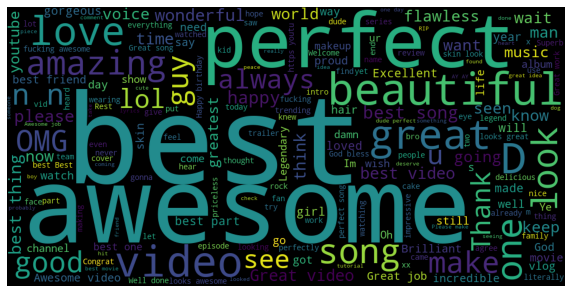

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('wordcloud.png')

In [20]:
comments_negative=data[data['Polarity']==-1]

In [21]:
total_comment=' '.join(comments_negative['comment_text'])

In [22]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comment)

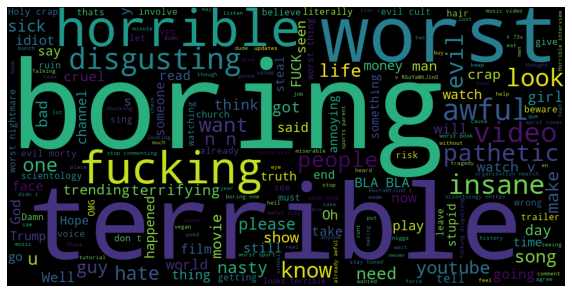

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('wordcloud_negative.png')

## Trending Views and tags

In [24]:
videos=pd.read_csv('GBvideos.csv',error_bad_lines=False)

b'Skipping line 2398: expected 11 fields, saw 21\nSkipping line 2797: expected 11 fields, saw 21\n'


In [25]:
videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,jt2OHQh0HoQ,Live Apple Event - Apple September Event 2017 ...,Apple Event,28,apple events|apple event|iphone 8|iphone x|iph...,7426393,78240,13548,705,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,13.09
1,AqokkXoa7uE,Holly and Phillip Meet Samantha the Sex Robot ...,This Morning,24,this morning|interview|holly willoughby|philli...,494203,2651,1309,0,https://i.ytimg.com/vi/AqokkXoa7uE/default.jpg,13.09
2,YPVcg45W0z4,My DNA Test Results! I'm WHAT?!,emmablackery,24,emmablackery|emma blackery|emma|blackery|briti...,142819,13119,151,1141,https://i.ytimg.com/vi/YPVcg45W0z4/default.jpg,13.09
3,T_PuZBdT2iM,getting into a conversation in a language you ...,ProZD,1,skit|korean|language|conversation|esl|japanese...,1580028,65729,1529,3598,https://i.ytimg.com/vi/T_PuZBdT2iM/default.jpg,13.09
4,NsjsmgmbCfc,Baby Name Challenge!,Sprinkleofglitter,26,sprinkleofglitter|sprinkle of glitter|baby gli...,40592,5019,57,490,https://i.ytimg.com/vi/NsjsmgmbCfc/default.jpg,13.09


In [28]:
tags=' '.join(videos['tags'])

In [34]:
import re
tag=re.sub('[^a-zA-Z]',' ',tags)

In [36]:
tag=re.sub(' +',' ',tag)

In [41]:
wordcloud=WordCloud(width=1000,height=1000,stopwords=set(STOPWORDS)).generate(tag)

(-0.5, 999.5, 999.5, -0.5)

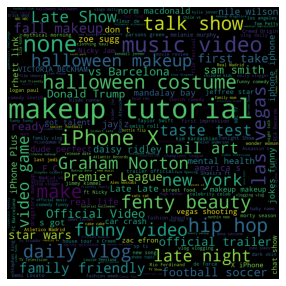

In [50]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')

## Relation between likes and views

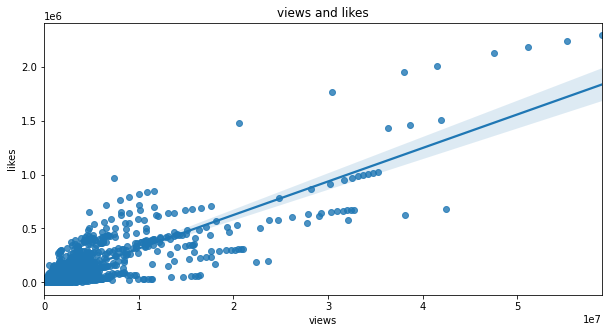

In [52]:
plt.figure(figsize=(10,5))
sns.regplot(data=videos,x='views',y='likes')
plt.title('views and likes')
plt.show()

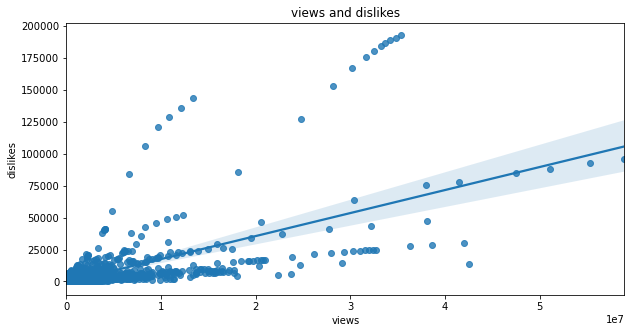

In [53]:
plt.figure(figsize=(10,5))
sns.regplot(data=videos,x='views',y='dislikes')
plt.title('views and dislikes')
plt.show()

### Find correlation between these variables

In [54]:
views=videos[['views','likes','dislikes']]
views.head()

,views,likes,dislikes
0,7426393,78240,13548
1,494203,2651,1309
2,142819,13119,151
3,1580028,65729,1529
4,40592,5019,57


In [59]:
correlation=views.corr()
correlation

,views,likes,dislikes
views,1.000000,0.866249,0.671703
likes,0.866249,1.000000,0.623797
dislikes,0.671703,0.623797,1.000000


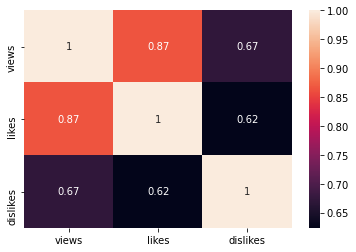

In [58]:
sns.heatmap(correlation,annot=True)